<a href="https://colab.research.google.com/github/TanakaSeiju/EU_M_Math-Repository/blob/main/chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

In [6]:
#chapter 8-2 重回帰
# インポート
import requests, zipfile
import io

# 自動車価格データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
auto.columns =['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [7]:
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(205, 26)


In [8]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
auto = auto[["horsepower", "width", "height", "price"]]
auto.isin(["?"]).sum()

horsepower    2
width         0
height        0
price         4
dtype: int64

In [10]:
auto = auto.replace("?", np.nan).dropna()
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(199, 4)


In [11]:
print('自動車データの形式:{}'.format(auto.dtypes))

自動車データの形式:horsepower     object
width         float64
height        float64
price          object
dtype: object


In [12]:
auto = auto.assign(price = pd.to_numeric(auto.price))
auto = auto.assign(horsepower = pd.to_numeric(auto.horsepower))
print('自動車データの形式:{}'.format(auto.dtypes))

自動車データの形式:horsepower      int64
width         float64
height        float64
price           int64
dtype: object


In [13]:
auto.corr()

,horsepower,width,height,price
horsepower,1.000000,0.615315,-0.087407,0.810533
width,0.615315,1.000000,0.309223,0.753871
height,-0.087407,0.309223,1.000000,0.134990
price,0.810533,0.753871,0.134990,1.000000


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = auto.drop("price", axis = 1)
Y = auto["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = None)

model = LinearRegression()
model.fit(X_train, Y_train)

print("決定係数(train):{:.3}" .format(model.score(X_train, Y_train)))
print("決定係数(test):{:.3}" .format(model.score(X_test, Y_test)))

print("\n回帰係数\n{}" .format(pd.Series(model.coef_, index = X.columns)))
print("切片:{:.3}" .format(model.intercept_))

決定係数(train):0.731
決定係数(test):0.801

回帰係数
horsepower     124.127026
width         1507.491560
height         227.201506
dtype: float64
切片:-1.11e+05


In [16]:
#Chap08_Ex-01
# インポート
import requests, zipfile
import io

# 自動車価格データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
auto.columns =['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

auto = auto[[ "price",'width', 'engine-size']]
auto.isin(["?"]).sum()
auto = auto.replace("?", np.nan).dropna()
auto = auto.assign(price = pd.to_numeric(auto.price))
auto.corr()

,price,width,engine-size
price,1.000000,0.751265,0.872335
width,0.751265,1.000000,0.729436
engine-size,0.872335,0.729436,1.000000


In [17]:
#Chap08_Ex-01
X = auto.drop("price", axis = 1)
Y = auto["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 0)

model = LinearRegression()
model.fit(X_train, Y_train)

print("決定係数(train):{:.3f}" .format(model.score(X_train, Y_train)))
print("決定係数(test):{:.3f}" .format(model.score(X_test, Y_test)))

決定係数(train):0.783
決定係数(test):0.778


In [ ]:
#chapter 8-3 ロジスティクス回帰
# データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
adult = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
adult.columns =['age','workclass','fnlwgt','education','education-num','marital-status',
                             'occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week',
                             'native-country','flg-50K']


# データの形式と欠損数を出力
print('データの形式:{}'.format(adult.shape))
print('欠損の数:{}'.format(adult.isnull().sum().sum()))

# データの先頭5行を出力
adult.head()

データの形式:(32561, 15)
欠損の数:0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
adult.groupby("flg-50K").size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

In [ ]:
adult["fin_flg"] = adult["flg-50K"].map(lambda x: 1 if x == " >50K" else 0)
adult.groupby("fin_flg").size()

fin_flg
0    24720
1     7841
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

X = adult[["age", "fnlwgt", "education-num", "capital-gain", "capital-loss"]]
y = adult["fin_flg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

model = LogisticRegression()
model.fit(X_train, y_train)

print("決定係数(train):{:.3}" .format(model.score(X_train, y_train)))
print("決定係数(test):{:.3}" .format(model.score(X_test, y_test)))

決定係数(train):0.797
決定係数(test):0.798


In [ ]:
model.coef_

array([[-1.185e-02, -4.379e-06, -2.774e-03,  3.274e-04,  7.532e-04]])

In [ ]:
np.exp(model.coef_)

array([[0.988, 1.   , 0.997, 1.   , 1.001]])

In [ ]:
#標準化のためのクラスをインポート
from sklearn.preprocessing import StandardScaler

X = adult[["age", "fnlwgt", "education-num", "capital-gain", "capital-loss"]]
y = adult["fin_flg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LogisticRegression()
model.fit(X_train_std, y_train)

print("決定係数(train):{:.3}" .format(model.score(X_train_std, y_train)))
print("決定係数(test):{:.3}" .format(model.score(X_test_std, y_test)))

決定係数(train):0.811
決定係数(test):0.81


In [ ]:
auto.head()

,horsepower,width,height,price
0,111,64.1,48.8,13495
1,111,64.1,48.8,16500
2,154,65.5,52.4,16500
3,102,66.2,54.3,13950
4,115,66.4,54.3,17450


In [18]:
#Chap08_Ex-02
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 0)

model = LogisticRegression()
model.fit(X_train, y_train)

print("正解率(train):{:.3f}" .format(model.score(X_train, y_train)))
print("正解率(test):{:.3f}" .format(model.score(X_test, y_test)))

正解率(train):0.958
正解率(test):0.923


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [19]:
#Chap08_Ex-03
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LogisticRegression()
model.fit(X_train_std, y_train)

print("正解率(train):{:.3}" .format(model.score(X_train_std, y_train)))
print("正解率(test):{:.3}" .format(model.score(X_test_std, y_test)))

正解率(train):0.991
正解率(test):0.958


In [ ]:
##chapter 8-4 正則化項のある回帰：ラッソ回帰、リッジ回帰
#リッジ回帰用のクラス
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X = auto.drop("price", axis = 1)
y = auto["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

linear = LinearRegression()
ridge = Ridge(random_state = 0)

for model in [linear, ridge]:
  model.fit(X_train, y_train)
  print('{}(train):{:.6f}'.format(model.__class__.__name__, model.score(X_train, y_train)))
  print("{}(test):{:.6f}".format(model.__class__.__name__, model.score(X_test, y_test)))
  

LinearRegression(train):0.733358
LinearRegression(test):0.737069
Ridge(train):0.733355
Ridge(test):0.737768


In [ ]:
#chapter 8-5 決定木
# データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
mushroom.columns =['classes','cap_shape','cap_surface','cap_color','bruises','odor',
                             'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
                             'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
                             'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
                             'ring_number','ring_type','spore_print_color','population','habitat']

# 先頭5行を表示
mushroom.head()

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
print('データの形式:{}'.format(mushroom.shape))
print('欠損の数:{}'.format(mushroom.isnull().sum().sum()))

データの形式:(8124, 23)
欠損の数:0


In [ ]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# 目的変数もフラグ化（0/1化）する
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x =='p' else 0)

In [ ]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [ ]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [ ]:
- (0.5 * np.log2(0.5) + 0.5 * np.log2(0.5))

1.000

In [ ]:
- (0.001 * np.log2(0.001) + 0.999 * np.log2(0.999))

0.011

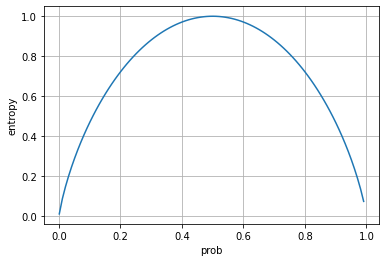

In [ ]:
def calc_entropy(p):
    return - (p * np.log2(p) + (1 - p) *  np.log2(1 - p) )

# pの値を0.001から0.999まで0.01刻みで動かす
p = np.arange(0.001, 0.999, 0.01)

# グラフ化
plt.plot(p, calc_entropy(p)) 
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

In [ ]:
mushroom_dummy.groupby('flg')['flg'].count()

flg
0    4208
1    3916
Name: flg, dtype: int64

In [ ]:
entropy_init = - (0.518 * np.log2(0.518) + 0.482 * np.log2(0.482))
print('毒キノコデータのエントロピーの初期値: {:.3f}'.format(entropy_init))

毒キノコデータのエントロピーの初期値: 0.999


In [ ]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [ ]:
# cap_colorがcでない場合のエントロピー
p1 = 4176 / (4176 + 3904)
p2 = 1 - p1
entropy_c0 = -(p1*np.log2(p1)+p2*np.log2(p2))
print('entropy_c0: {:.3f}'.format(entropy_c0))

entropy_c0: 0.999


In [ ]:
# cap_colorがcである場合のエントロピー
p1 = 32/(32+12)
p2 = 1 - p1
entropy_c1 = -(p1*np.log2(p1)+p2*np.log2(p2))
print('entropy_c1: {:.3f}'.format(entropy_c1))

entropy_c1: 0.845


In [ ]:
entropy_after = (4176+3904)/8124*entropy_c0 + (32+12)/8124*entropy_c1
print('データ分割後の平均エントロピー: {:.3f}'.format(entropy_after))

データ分割後の平均エントロピー: 0.998


In [ ]:
print('変数cap_colorの分割によって得られる情報利得: {:.3f}'.format(entropy_init - entropy_after))

変数cap_colorの分割によって得られる情報利得: 0.001


In [ ]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [ ]:
# gill_colorがbでない場合のエントロピー
p1 = 4208/(4208+2188)
p2 = 1 - p1
entropy_b0 = - (p1*np.log2(p1) + p2*np.log2(p2))

# gill_colorがbである場合のエントロピー
p1 = 0/(0+1728)
p2 = 1 - p1
entropy_b1 = - (p2*np.log2(p2))

entropy_after = (4208+2188)/8124*entropy_b0 + (0+1728)/8124*entropy_b1
print('変数gill_colorの分割によって得られる情報利得: {:.3f}'.format(entropy_init - entropy_after))

変数gill_colorの分割によって得られる情報利得: 0.269


In [ ]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# データ分割
X = mushroom_dummy.drop('flg', axis=1)
y = mushroom_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 決定木クラスの初期化と学習
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.991
正解率(test):0.992


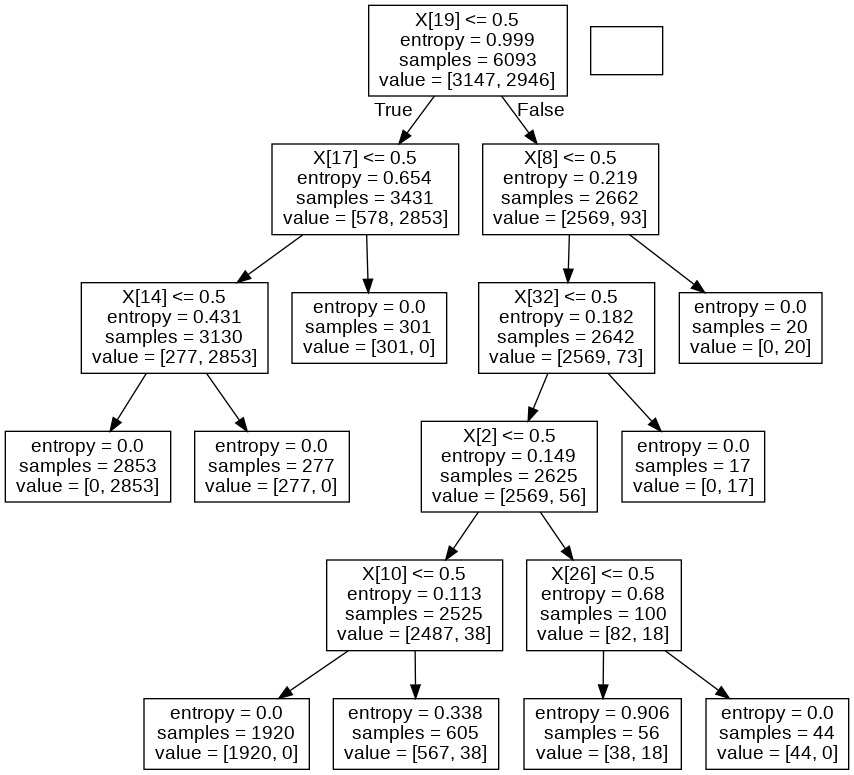

In [ ]:
# 参考プログラム
# pydotplusやgraphvizをインストールする必要があります(GoogleColaboratory上ではインストール不要)
from sklearn import tree
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

In [21]:
#Chap08_Ex-05
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

models = {
    "tree1": DecisionTreeClassifier(criterion = "entropy", max_depth = 3, random_state = 0),
    "tree2": DecisionTreeClassifier(criterion = "entropy", max_depth = 5, random_state = 0),
    "tree3": DecisionTreeClassifier(criterion = "entropy", max_depth = 10, random_state = 0),
    "tree4": DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 0),
    "tree5": DecisionTreeClassifier(criterion = "gini", max_depth = 5, random_state = 0),
    "tree6": DecisionTreeClassifier(criterion = "gini", max_depth = 10, random_state = 0)
}

scores = {}
for model_name, model in models.items():
  model.fit(X_train, y_train)
  scores[(model_name, "train")] = model.score(X_train, y_train)
  scores[(model_name, "test")] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test,train
tree1,0.930070,0.971831
tree2,0.902098,0.997653
tree3,0.902098,1.000000
tree4,0.923077,0.974178
tree5,0.895105,1.000000
tree6,0.895105,1.000000


In [20]:
#Chap08_Ex-04
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

X = auto.drop("price", axis = 1)
Y = auto["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 0)

models = {
    "linear" : LinearRegression(),
    "lasso1" : Lasso(alpha = 1.0, random_state = 0),
    "lasso2" : Lasso(alpha = 200.0, random_state = 0)
}

scores = {}

for model_name, model in models.items():
  model.fit(X_train, Y_train)
  scores[(model_name, "train")] = model.score(X_train, Y_train)
  scores[(model_name, "test")] = model.score(X_test, Y_test)

pd.Series(scores).unstack()

,test,train
lasso1,0.778308,0.783189
lasso2,0.782421,0.782839
linear,0.778292,0.783189


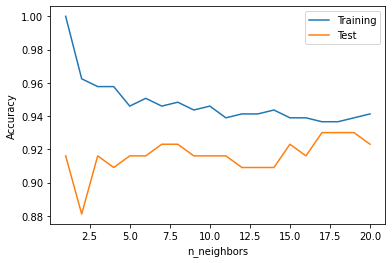

In [ ]:
#chapter 8-6 k-NN(k近傍法)
# データやモデルを構築するためのライブラリ等のインポート
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 0)

training_accuracy = []
test_accuracy = []

for n_neighbors in range(1,21):
  model = KNeighborsClassifier(n_neighbors = n_neighbors)
  model.fit(X_train, y_train)
  training_accuracy.append(model.score(X_train, y_train))
  test_accuracy.append(model.score(X_test, y_test))

plt.plot(range(1,21), training_accuracy, label='Training')
plt.plot(range(1,21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

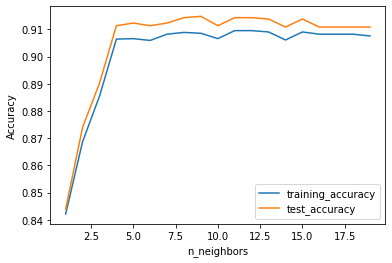

In [22]:
#Chap08_Ex-06
from sklearn import neighbors
from sklearn.neighbors import  KNeighborsClassifier

# データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
mushroom.columns =['classes','cap_shape','cap_surface','cap_color','odor','bruises',
                             'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
                             'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
                             'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
                             'ring_number','ring_type','spore_print_color','population','habitat']

mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x =='p' else 0)

X = mushroom_dummy.drop("flg", axis = 1)
Y = mushroom_dummy["flg"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 40)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
  model = KNeighborsClassifier(n_neighbors = n_neighbors)
  model.fit(X_train, y_train)
  training_accuracy.append(model.score(X_train, y_train))
  test_accuracy.append(model.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training_accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

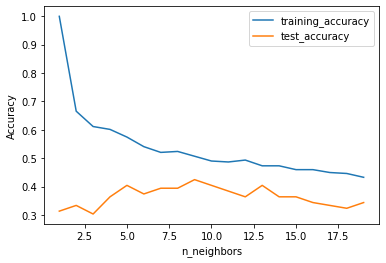

In [23]:
#Chap08_Ex-07
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import requests, zipfile
from io import StringIO
import io

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(url, stream = True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()


student = pd.read_csv('student-mat.csv', sep=';')
X = student.loc[:, ['age','Medu','Fedu','traveltime','studytime'
                              ,'failures','famrel','freetime','goout','Dalc','Walc'
                              ,'absences','G1','G2']].values

X_train, X_test, y_train, y_test = train_test_split(X, student.G3, random_state = 30)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
  model = KNeighborsClassifier(n_neighbors = n_neighbors)
  model.fit(X_train, y_train)
  training_accuracy.append(model.score(X_train, y_train))
  test_accuracy.append(model.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training_accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [ ]:
#chapter 8-7 サポートベクターマシン
#SVMのライブラリ
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 0)

model = LinearSVC(random_state = 0)
model.fit(X_train, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.923
正解率(test):0.930


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# データの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# クラスの初期化と学習
model = LinearSVC()
model.fit(X_train_std,y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.993
正解率(test):0.951


In [24]:
#Chap08_Ex-08
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 50)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = SVC(kernel = "rbf", random_state = 0, C = 2)
model.fit(X_train_std, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.988
正解率(test):0.986


In [ ]:
"""
Chap08_Cm-01
回帰
→機械学習モデルの一般的なタイプの一種で、数値(連続値)の推定を行う。実用例として、気象分析や金融予測などに使用される。
https://avinton.com/academy/classification-regression/

分類
→回帰と同様に、機械学習の主な用途の一つである。だが、回帰が値の推定を行うのに対し、分類は、カテゴリ(離散値)の推定を行う。実用例として、画像分類を使用した、画像検索や在庫の管理などに使用されている。
https://avinton.com/academy/classification-regression/

教師あり学習
→学習データに正解を与えた状態で学習させる、機械学習の一種である。そのため、正解、不正解が明確な問題の解決に利用できる。また、ビッグデータを実用的なもの仕上げることも可能である。実用例として、システムの不正行為の検出や、画像・音声認識などに使用されている。
https://www.datarobot.com/jp/wiki/supervised-machine-learning/

重回帰分析
→統計学上のデータ解析手法の一つである。ある結果を説明する際に、関連する複数の要因のうち、どの変数がどの程度結果を左右するのかを関数で数値化し、それを元に予測を行う統計手法のことである。売上予測などに使用される。
https://www.intage.co.jp/glossary/402/

ロジスティクス回帰分析
→いくつかの要因から２値の結果が起こる確率を推定する統計手法である。重回帰分析との違いは、重回帰分析は目的変数が量的なのに対し、ロジスティクス回帰分析は質的である。使用例として、患者の検査値から病気の発生率の予測などに使用される。
https://gmo-research.jp/research-column/logistic-regression-analysis#:~:text=%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90%E3%81%AF%E3%80%81%E3%81%84%E3%81%8F%E3%81%A4,%E3%82%88%E3%81%8F%E4%BD%BF%E3%82%8F%E3%82%8C%E3%81%A6%E3%81%84%E3%81%BE%E3%81%99%E3%80%82


正則化
→学習データを過剰に学習した結果、汎化能力が欠けた状態になることを過学習という。正則化は、その過学習を防ぐために使用されている。
https://qiita.com/kenta1984/items/91ab29fae8cd3920cf2b

リッジ回帰
→正則化には、機械学習モデルの係数を必要なものだけ見つけ出し、不要なものはなくす変数選択と、機械学習モデルの特定の係数だけ大きくならないように制御する縮小推定がある。リッジ回帰は、係数の二乗和が大きくなりすぎないように制御する、縮小推定の一種でる。正則化の一種のため、過学習を防ぐために使用される。
https://nisshingeppo.com/ai/regularization/

ラッソ回帰
→係数の絶対値の和が大きくならないように制御する縮小推定の一種である。正則化の一種のため、過学習を防ぐために使用される。
https://nisshingeppo.com/ai/regularization/

決定木
→観測された変数の中から目的変数に影響する説明変数を明らかにし、樹木上のモデルを作成する分析手法である。主にマーケティングで使用される。
https://surveroid.jp/mr-journal/terms/Atckv

エントロピー
→情報の乱雑さである情報の期待値のことを指す。
https://www.hellocybernetics.tech/entry/2016/04/20/194040

情報利得
→データ分割の前後を比較してどれだけ綺麗にデータを分割できたかを数値化したものである。
https://dev.classmethod.jp/articles/2017ad_20171211_dt-2/#sec4

k-NN法
→近接性を利用して個々のデータ、ポイントのグループ化に関する分類や予測を行うアルゴリズムである。実用例として、パターン認識や単純な推奨システムなどで使用される。
https://www.ibm.com/jp-ja/topics/knn

SVM
→あるクラスのデータ点を、別のクラスのデータ点から、可能な限り分離する超平面を見つけ出す手法のことである。実用例として、自然言語処理や音声及び画像認識で使用される。
https://jp.mathworks.com/discovery/support-vector-machine.html#:~:text=%E3%82%B5%E3%83%9D%E3%83%BC%E3%83%88%E3%83%99%E3%82%AF%E3%82%BF%E3%83%BC%E3%83%9E%E3%82%B7%E3%83%B3%20(SVM)%20%E3%81%AF,%E5%B9%B3%E9%9D%A2%E3%82%92%E8%A6%8B%E3%81%A4%E3%81%91%E3%82%8B%E3%81%93%E3%81%A8%E3%81%A7%E3%81%99%E3%80%82

ノーフリーランチ
→ある領域に問題に対する最適化アルゴリズムは、その特徴や癖を事前知識として、その領域に特化したものにしなければならないという意味を指す。
https://www.cresco.co.jp/blog/entry/2488/#:~:text=%E3%81%9D%E3%81%AE%E5%90%8D%E3%82%82%E3%80%8C%E3%83%8E%E3%83%BC%E3%83%95%E3%83%AA%E3%83%BC,%E3%82%82%E3%81%AE%E3%81%AF%E3%81%AA%E3%81%84%E3%80%8D%E3%81%A8%E3%81%84%E3%81%86%E3%81%93%E3%81%A8%E3%80%82
"""

